# Project 8 - Decision trees and neural networks

## Set Up

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

from graphviz import Source
from IPython.display import SVG

## Read & Clean the Data

Also update the name of the target column to not include a space at the beginning.

(Not using this on anymore)
And add a new target column that includes the top 25% as popular (1) and the bottom 75% as unpopular (0).

Also add a new target column that includes any article with at least 1400 shares as popular (1) and those below 1400 as unpopular (0).

In [2]:
news = pd.read_csv('OnlineNewsPopularity.csv')
news = news.rename({' shares':'shares'}, axis=1)
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### Feature Selection

Our dataset had about 60 features. We did not want to use all 60 in the interest of time. We selected a few features based on the following: perceived ease of use, what we found interesting, and what we thought would be good predictors.

**Selected Features:**

n_tokens_content, num_keywords, is_weekend, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, self_reference_avg_sharess, is_weekend, avg_positive_polarity, avg_negative_polarity


**Target Variable:**

popular (0,1) - derived from shares

In [4]:
# select  columns
featured_cols= [ ' n_tokens_content',' num_keywords',
                ' data_channel_is_lifestyle', 
                ' data_channel_is_entertainment', 
                ' data_channel_is_bus',
                ' data_channel_is_socmed', 
                ' data_channel_is_tech',
                ' data_channel_is_world',
                ' self_reference_avg_sharess',
                ' is_weekend',
                ' avg_positive_polarity', ' avg_negative_polarity', 
                'shares']

news = news[featured_cols]
news.dropna

news.head()

,n_tokens_content,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,self_reference_avg_sharess,is_weekend,avg_positive_polarity,avg_negative_polarity,shares
0,219.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,496.000000,0.0,0.378636,-0.350000,593
1,255.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.286915,-0.118750,711
2,211.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,918.000000,0.0,0.495833,-0.466667,1500
3,531.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.385965,-0.369697,1200
4,1072.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,3151.157895,0.0,0.411127,-0.220192,505


### Define a Threshold

At first we tried taking the top 25% to be popular, but we found it worked better with a 50/50 split, where anything with at least 1400 shares was considered popular.

In [5]:
news['popular'] = (news['shares'] >= 1400).astype(int)
news.head()

,n_tokens_content,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,self_reference_avg_sharess,is_weekend,avg_positive_polarity,avg_negative_polarity,shares,popular
0,219.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,496.000000,0.0,0.378636,-0.350000,593,0
1,255.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.286915,-0.118750,711,0
2,211.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,918.000000,0.0,0.495833,-0.466667,1500,1
3,531.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.385965,-0.369697,1200,0
4,1072.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,3151.157895,0.0,0.411127,-0.220192,505,0


Here we can see some statistics for the original target column and the new target columnn.

In [6]:
news['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [7]:
news['popular'].describe()

count    39644.000000
mean         0.533599
std          0.498876
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: popular, dtype: float64

## Decision Tree Analysis

In [8]:
# create a list of feature columns
feature_cols = [' n_tokens_content',
                ' data_channel_is_lifestyle', 
                ' data_channel_is_entertainment', 
                ' data_channel_is_bus',
                ' data_channel_is_socmed', 
                ' data_channel_is_tech',
                ' data_channel_is_world',
                ' is_weekend']

X = news[feature_cols]
y = news.popular

### Tree 1: Max Depth = 3

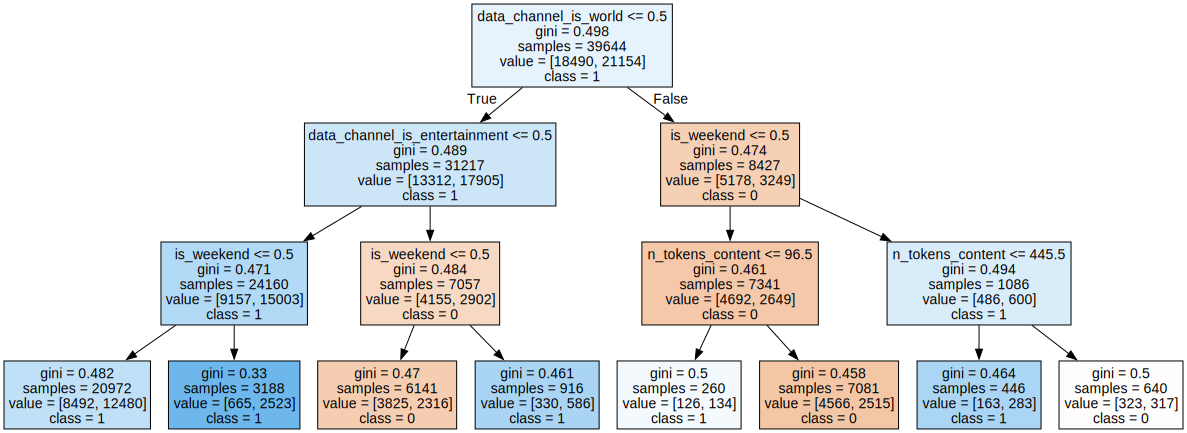

In [9]:
# fit a classification tree with max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

### Tree 2: Max Depth = 5

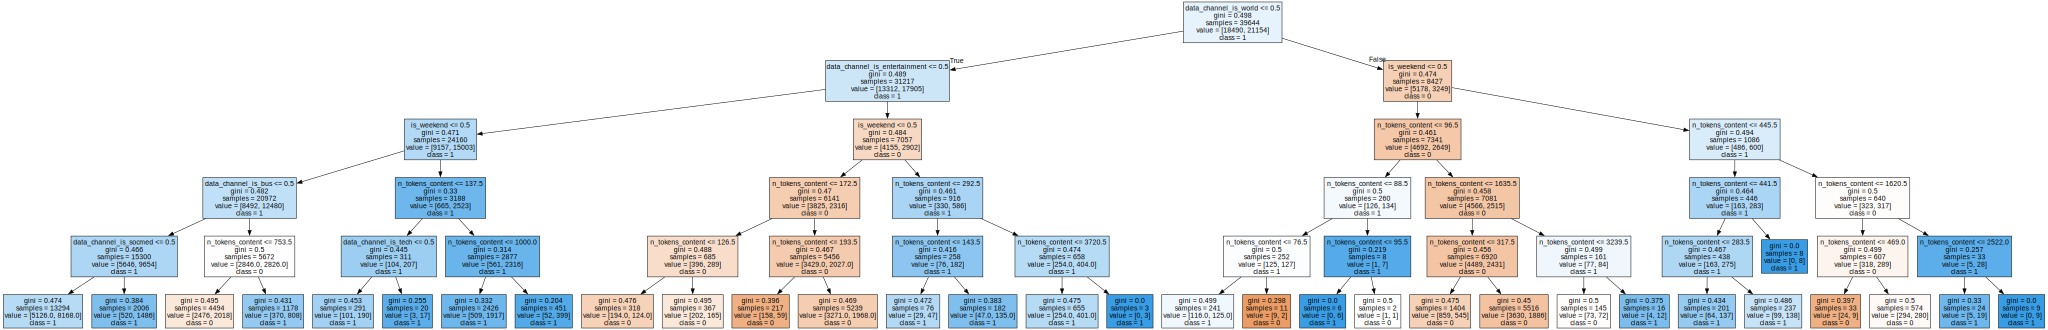

In [10]:
# fit a classification tree with max_depth=5
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

### Tree 3: Max Depth = 4

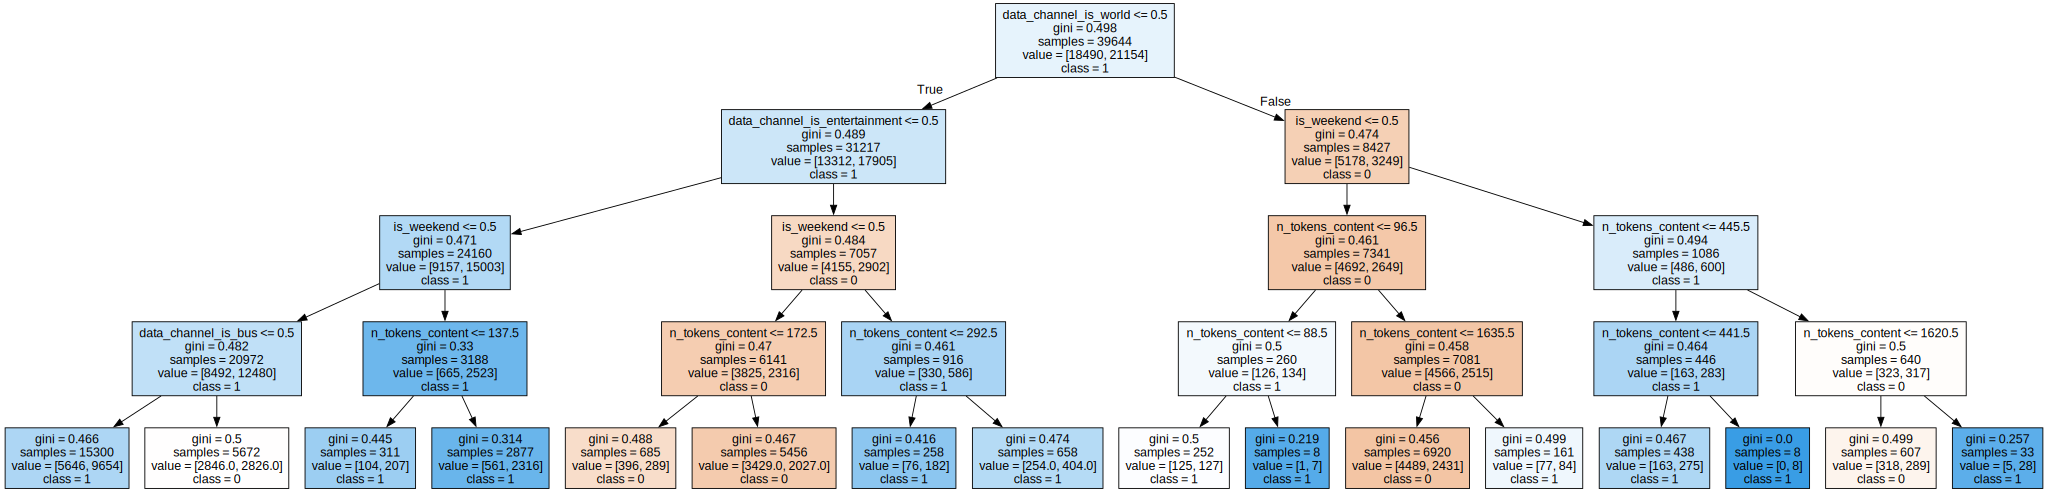

In [11]:
# fit a classification tree with max_depth=4
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)

# create a Graphviz file
with open("news.dot", 'w') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols, class_names=['0', '1'], filled = True)

dot = tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled = True)

# in order to get the visualization to work here, you have to install graphviz
# I ran: pip install graphviz
# but was still having issues until I ran: brew install graphviz
# this doesn't work, you can uncomment the print statement and copy and paste the output to this website
# output dot code to copy/paste into https://dreampuf.github.io/GraphvizOnline
# print(dot)

# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

## Neural Net Analysis

In [12]:
features= [' n_tokens_content',
                ' data_channel_is_lifestyle', 
                ' data_channel_is_entertainment', 
                ' data_channel_is_bus',
                ' data_channel_is_socmed', 
                ' data_channel_is_tech',
                ' data_channel_is_world',
                ' is_weekend']


news.drop('shares', axis = 1, inplace=True)


X = news.drop('popular', axis =1)
y = news['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X.columns 
y.unique()
news.head()

,n_tokens_content,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,self_reference_avg_sharess,is_weekend,avg_positive_polarity,avg_negative_polarity,popular
0,219.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,496.000000,0.0,0.378636,-0.350000,0
1,255.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.286915,-0.118750,0
2,211.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,918.000000,0.0,0.495833,-0.466667,1
3,531.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.385965,-0.369697,0
4,1072.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,3151.157895,0.0,0.411127,-0.220192,0


In [13]:
# Data pre-processing

scalar = StandardScaler()

scalar.fit(X_train)

#apply transformations
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
 
X_train

array([[-0.4138954 , -0.12139574, -0.23690062, ..., -0.38843351,
        -0.95325838,  0.23077063],
       [-0.20840817, -2.21809018, -0.23690062, ..., -0.38843351,
         0.38452112, -1.6280085 ],
       [-0.64078755, -0.12139574, -0.23690062, ..., -0.38843351,
        -0.89116909, -0.44337103],
       ...,
       [-0.52948197, -1.69391657, -0.23690062, ..., -0.38843351,
         0.48044134, -0.19010371],
       [-0.15489587, -0.64556935, -0.23690062, ..., -0.38843351,
         0.05999664,  0.24686996],
       [-0.71142379,  0.40277787, -0.23690062, ...,  2.57444321,
        -0.29113149,  0.43547825]])

In [14]:
#mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=500)
#mlp = MLPClassifier(hidden_layer_sizes=3,max_iter=500)
#mlp = MLPClassifier(hidden_layer_sizes=(15,8,5),max_iter=1000)
mlp = MLPClassifier(hidden_layer_sizes=(12, 9, 6, 3),max_iter=500)

In [15]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(12, 9, 6, 3), max_iter=500)

In [16]:
predictions = mlp.predict(X_test)

In [17]:
print(confusion_matrix(y_test,predictions))

[[2607 1992]
 [1554 3758]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      4599
           1       0.65      0.71      0.68      5312

    accuracy                           0.64      9911
   macro avg       0.64      0.64      0.64      9911
weighted avg       0.64      0.64      0.64      9911



In [19]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 12 input nodes and 2 output node(s)
There are 5 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 12x12 (12 nodes feeding into a layer of 12 nodes)
  1: 12x9 (12 nodes feeding into a layer of 9 nodes)
  2: 9x6 (9 nodes feeding into a layer of 6 nodes)
  3: 6x3 (6 nodes feeding into a layer of 3 nodes)
  4: 3x1 (3 nodes feeding into a layer of 1 nodes)

There are 5 1D arrays of intercepts, one for each layer
Each layer has [12, 9, 6, 3, 1] intercepts, one for each node


### Draw the Neural Network

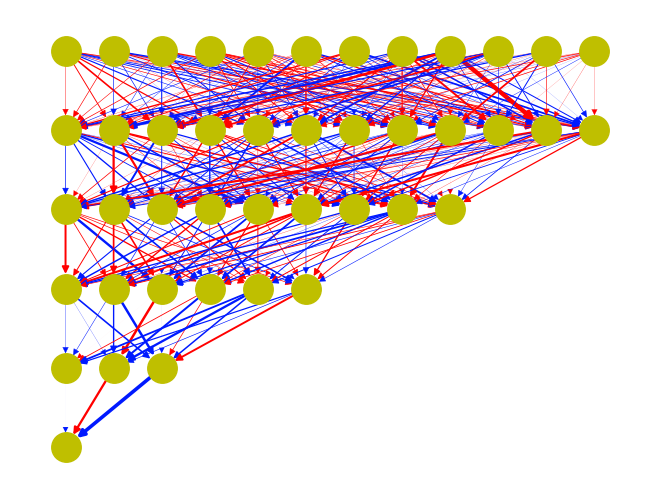

In [20]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)